## 习题 1.4

In [1]:
data <- read.csv("./ex_1_4.csv")
cat(names(data))

X.序号 省市区 X11月 X1.11月

设「11月」为 $X_1$, 「1～11月」为 $X_2$：

In [2]:
data <- data[-1]  # remove "序号" col
names(data) <- c("Province", "X1", "X2")
data

Province,X1,X2
<chr>,<dbl>,<dbl>
北京,35.22,499.80
天津,10.41,161.37
河北,17.22,273.29
山西,10.70,134.79
内蒙古,10.29,90.92
辽宁,18.66,348.99
吉林,4.41,106.89
黑龙江,6.24,196.44
上海,49.72,656.95


In [3]:
attach(data)

#### (1) 均值、方差、标准差、变异系数、偏度、峰度

调用库完成：

In [4]:
library(psych)
describe(data[-1], type=2)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,31,19.16645,19.79977,14.77,15.7252,8.258082,0.77,99.32,98.55,2.515352,8.266989,3.556143
X2,2,31,246.19323,232.97210,179.41,210.6356,123.856404,6.08,1080.26,1074.18,1.915957,4.385233,41.843024


手动实现：

In [5]:
describes <- function(df) {
    cv <- function(x) sd(x)/mean(x)  # 变异系数

    g1 <- function(x) {  # 偏度
        n <- length(x)
        A <- n / ((n-1) * (n-2))
        B <- 1 / sd(x)^3
        S <- sum((x - mean(x))^3)
        A * B * S
    }

    g2 <- function(x) {  # 峰度
        n <- length(x)
        A <- (n * (n+1)) / ((n-1) * (n-2) * (n-3))
        B <- 1 / sd(x)^4
        S <- sum((x - mean(x))^4)
        C <- (3 * (n-1)^2) / ((n-2) * (n-3))
        A * B * S - C
    }
    
    itm <- matrix(c("均值", "方差", "标准差", "变异系数", "偏度", "峰度"), 6, 1)
    res <- apply(df, 2, 
                 function(x) c(mean(x), var(x), sd(x), cv(x), g1(x), g2(x)))
    
    cbind(itm, res)
}

In [6]:
describes(data[-1])

,X1,X2
均值,19.1664516129032,246.193225806452
方差,392.030750322581,54275.9982492473
标准差,19.7997664209096,232.972097576614
变异系数,1.0330428824697,0.946297757842323
偏度,2.51535182567297,1.91595698889706
峰度,8.26698939080861,4.38523271345801


#### （2）中位数、上下四分位数、四分位极差

五数：minimum, lower-hinge, median, upper-hinge, maximum

In [7]:
fn <- apply(data[-1], 2, fivenum)
fn

X1,X2
0.770,6.080
8.265,105.350
14.770,179.410
20.080,270.745
99.320,1080.260


In [8]:
# 四分位极差
R1 <- function(Q3, Q1) Q3 - Q1

R1(Q3=fn[4,], Q1=fn[2,])

X1      X2 
 11.815 165.395

#### （3）直方图

In [9]:
histogram <- function(x, xname="x") {
    hist(x, prob=TRUE, main=paste("Histogram of" , xname))
    lines(density(x))
    rug(x) # show the actual data points
}

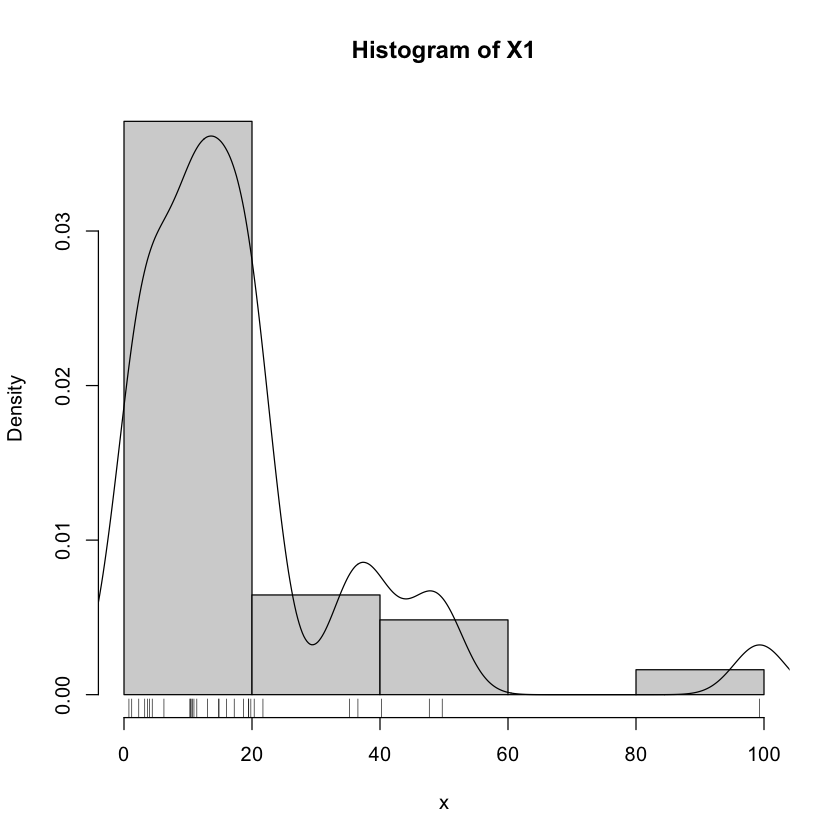

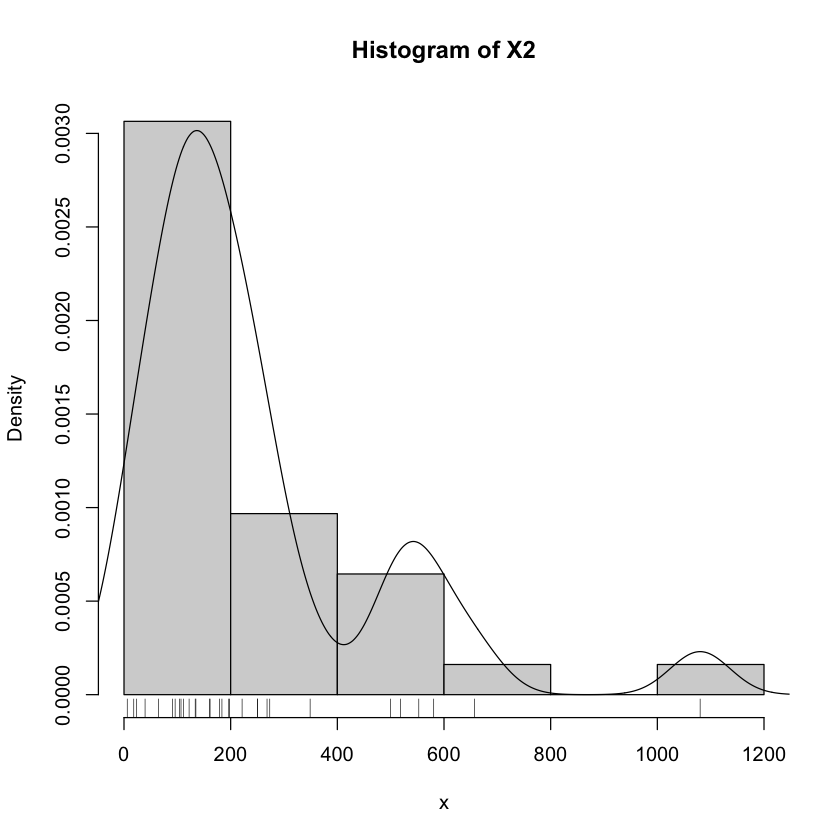

In [10]:
histogram(X1, "X1")
histogram(X2, "X2")

#### (4) 经验分布函数图

In [11]:
plot_ecdf <- function(x, xname="x") {
    plot(ecdf(x), do.points=FALSE, verticals=TRUE, main=paste("ecdf(" , xname, ")"))
    
    xs <- seq(min(x), max(x), 1/sqrt(length(x)))
    lines(xs, pnorm(xs, mean=mean(x), sd=sd(x)), lty=3, col="red")
}

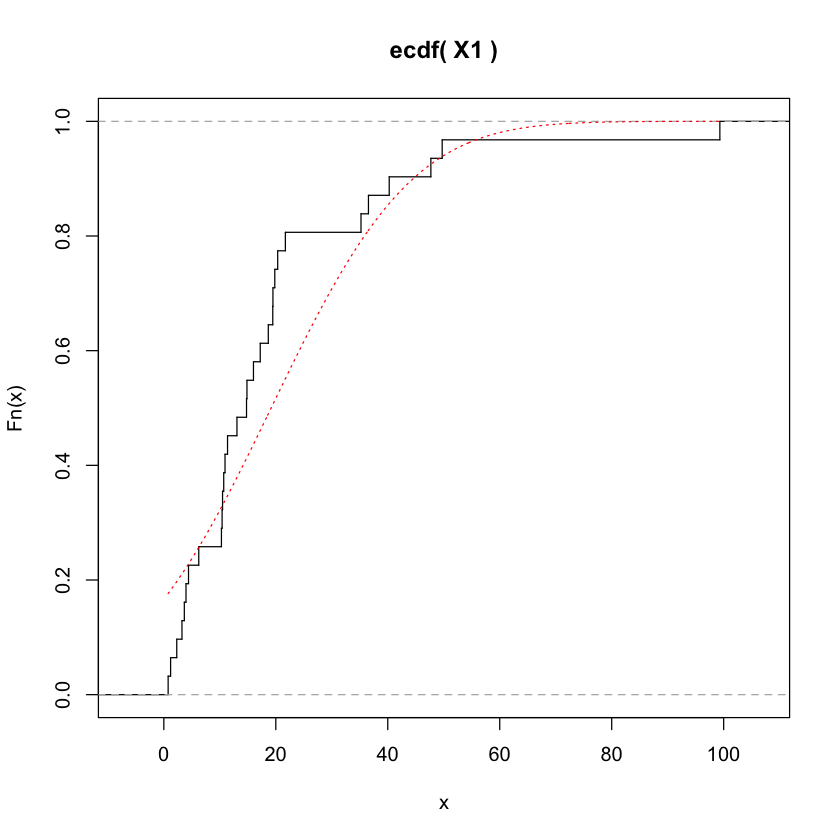

In [12]:
plot_ecdf(X1, "X1")

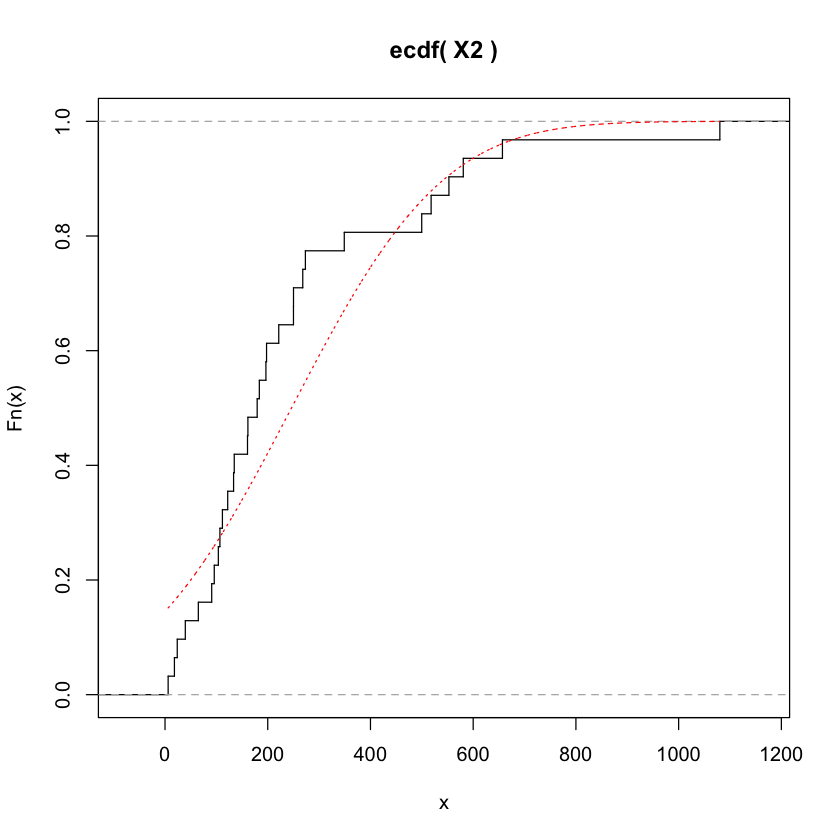

In [13]:
plot_ecdf(X2, "X2")

正态QQ图：

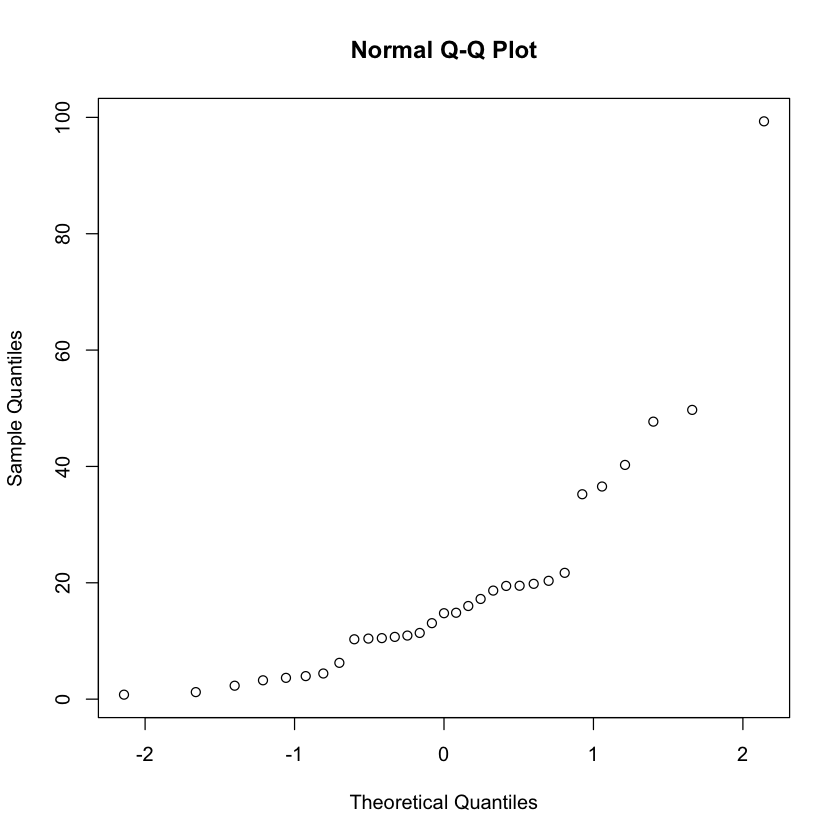

In [14]:
qqnorm(X1)

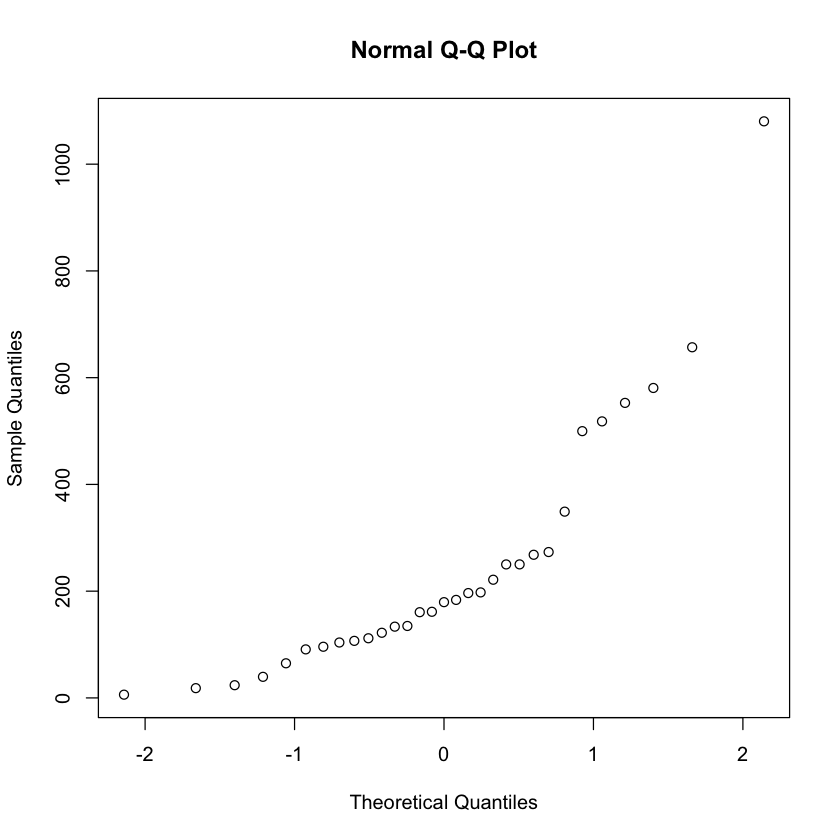

In [15]:
qqnorm(X2)

#### (5) $X_1$、$x_2$ 的 Pearson 相关系数与 Spearman 相关系数

In [16]:
cor.test(X1, X2, method="pearson")


	Pearson's product-moment correlation

data:  X1 and X2
t = 24.265, df = 29, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9508176 0.9886055
sample estimates:
      cor 
0.9762474 


In [17]:
cor.test(X1, X2, method="spearman")


	Spearman's rank correlation rho

data:  X1 and X2
S = 358, p-value = 9.781e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9278226 


In [18]:
detach(data)